#### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

#### Data from training output example

In [2]:
# Change here paths to read
indexs_path = 'model_analysis/Train_out/Ejemplo_01/indices.npy'
labels_path = 'model_analysis/Train_out/Ejemplo_01/labels.npy'
predictions_path = 'model_analysis/Train_out/Ejemplo_01/predictions.npy'

# Load the data from the NPY file
index_data = np.load(indexs_path)
labels_data = np.load(labels_path)
predictions_data = np.load(predictions_path)

print('indexs length: ', len(index_data))
print(index_data)

print('labels length: ', len(labels_data))
print(labels_data)

print('predictions length: ', len(predictions_data))
print(predictions_data)

indexs length:  600
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1

#### Extract datasets from H5 and test filtered data

In [3]:
# Test events
filtered_index = 'model_analysis/Train_out/data/IWCD_mPMT_Short_1000_evts_gme.npz'
filtered_indices = np.load(filtered_index, allow_pickle=True)
test_filtered_indices = filtered_indices['val_idxs']

# H5 original data file
h5_path = 'model_analysis/Train_out/data/IWCD_mPMT_Short_pi0_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_1000_evts_gme.h5'
f = h5py.File(h5_path, 'r')

original_positions = np.array(f['positions'])
original_labels = np.array(f['labels'])


# filtered_eventdata = original_eventdata[test_filtered_indices]
test_positions = original_positions[test_filtered_indices]
test_labels = original_labels[test_filtered_indices]

print('Test positions length: ', len(test_positions))
print(test_positions)

print('Test labels length: ', len(test_labels))
print(test_labels)

Test positions length:  600
[[[-249.15762  -230.79518    24.785328]]

 [[  59.12671  -259.30606   257.18765 ]]

 [[-146.06729   280.36752    32.495644]]

 ...

 [[-259.77808    22.689665  117.7628  ]]

 [[  70.00241   -49.031174  318.02045 ]]

 [[ -85.013435  199.53003  -194.54231 ]]]
Test labels length:  600
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

#### Matching vs Mismatching Positions Plot

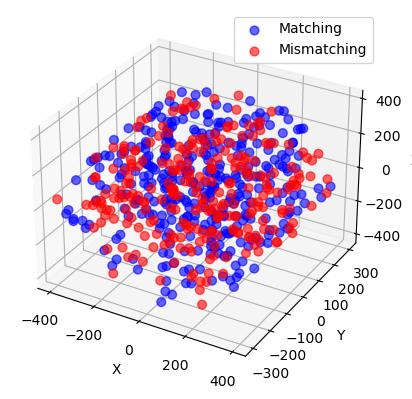

In [4]:
# Create a mask to separate matching and mismatching points
matching_mask = (test_labels == predictions_data)

# Separate matching and mismatching positions
matching_positions = test_positions[matching_mask]
mismatching_positions = test_positions[~matching_mask]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot matching points in blue
ax.scatter(matching_positions[:, 0, 0], matching_positions[:, 0, 1], matching_positions[:, 0, 2], c='blue', label='Matching', s=40, alpha=0.6)

# Plot mismatching points in red
ax.scatter(mismatching_positions[:, 0, 0], mismatching_positions[:, 0, 1], mismatching_positions[:, 0, 2], c='red', label='Mismatching', s=40, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()
plt.show()


### Interactive 3D plot

In [5]:
# Create traces for matching and mismatching points
matching_trace = go.Scatter3d(
    x=matching_positions[:, 0, 0],
    y=matching_positions[:, 0, 1],
    z=matching_positions[:, 0, 2],
    mode='markers',
    name='Matching',
    marker=dict(
        color='blue',
        size=5,
        symbol='circle'
    )
)

mismatching_trace = go.Scatter3d(
    x=mismatching_positions[:, 0, 0],
    y=mismatching_positions[:, 0, 1],
    z=mismatching_positions[:, 0, 2],
    mode='markers',
    name='Mismatching',
    marker=dict(
        color='red',
        size=5,
        symbol='circle'
    )
)

# Create layout for the plot
layout = go.Layout(
    title='Matching and Mismatching Events',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    showlegend=True
)

# Create figure and add traces to it
fig = go.Figure(data=[matching_trace, mismatching_trace], layout=layout)

# Display the interactive plot
fig.show()

#### Comparison of True and Predicted Labels

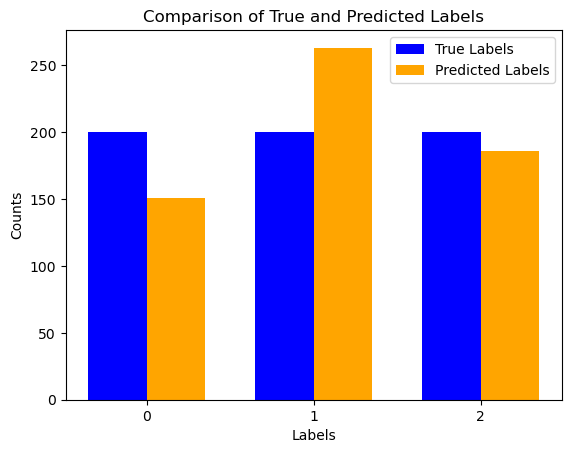

In [6]:
# Count the occurrences of each label
unique_labels, true_label_counts = np.unique(test_labels, return_counts=True)
_, predicted_label_counts = np.unique(predictions_data, return_counts=True)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(unique_labels))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, true_label_counts, color='blue', width=bar_width, label='True Labels')
plt.bar(r2, predicted_label_counts, color='orange', width=bar_width, label='Predicted Labels')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Comparison of True and Predicted Labels')
plt.xticks([r + bar_width/2 for r in range(len(unique_labels))], unique_labels)

# Add legend
plt.legend()

# Display the plot
plt.show()


### Analysis per particle

According to data, labels represent every particle on the following way:
 - 0 = gamma
 - 1 = electron
 - 2 = muon
 - 3 = pion

#### Extract data per particle

In [7]:
# get test indices per particle

# gamma particle
gamma_test_filtered_indices = test_filtered_indices[:200]
print(gamma_test_filtered_indices)

# e particle
e_test_filtered_indices = test_filtered_indices[200:400]
print(e_test_filtered_indices)


# get positions and labels per particle on tests

# positions
gamma_test_positions = original_positions[gamma_test_filtered_indices]
e_test_positions = original_positions[e_test_filtered_indices]
print(len(gamma_test_positions))
print(gamma_test_positions)
print(len(e_test_positions))
print(e_test_positions)

# labels
gamma_test_labels = original_labels[gamma_test_filtered_indices]
e_test_labels = original_labels[e_test_filtered_indices]
print(len(gamma_test_labels))
print(gamma_test_labels)
print(len(e_test_labels))
print(e_test_labels)


# get predictions per particle

# gamma predictions
gamma_predictions = predictions_data[:200]
print(len(gamma_predictions))
print(gamma_predictions)

# e predictions
e_predictions = predictions_data[200:400]
print(len(e_predictions))
print(e_predictions)

[1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213
 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227
 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241
 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255
 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269
 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283
 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297
 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311
 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325
 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339
 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353
 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367
 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381
 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395
 1396 

#### matching vs mismatching plot per particle

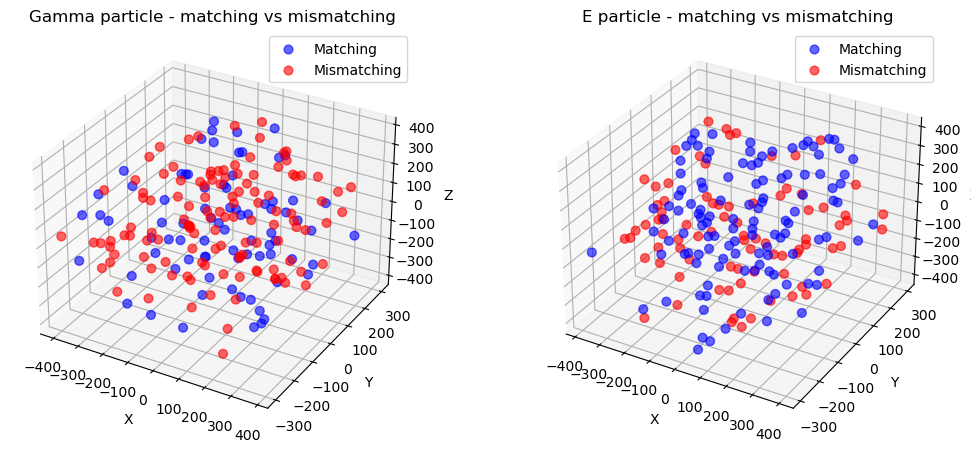

In [8]:
## gamma particle
# Create a mask to separate matching and mismatching points
gamma_matching_mask = (gamma_test_labels == gamma_predictions)
# Separate matching and mismatching positions
gamma_matching_positions = gamma_test_positions[gamma_matching_mask]
gamma_mismatching_positions = gamma_test_positions[~gamma_matching_mask]

## e particle
# Create a mask to separate matching and mismatching points
e_matching_mask = (e_test_labels == e_predictions)
# Separate matching and mismatching positions
e_matching_positions = e_test_positions[e_matching_mask]
e_mismatching_positions = e_test_positions[~e_matching_mask]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

# gamma plot
ax1.scatter(gamma_matching_positions[:, 0, 0], gamma_matching_positions[:, 0, 1], gamma_matching_positions[:, 0, 2], c='blue', label='Matching', s=40, alpha=0.6)
ax1.scatter(gamma_mismatching_positions[:, 0, 0], gamma_mismatching_positions[:, 0, 1], gamma_mismatching_positions[:, 0, 2], c='red', label='Mismatching', s=40, alpha=0.6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Gamma particle - matching vs mismatching')
ax1.legend()

# e plot
ax2.scatter(e_matching_positions[:, 0, 0], e_matching_positions[:, 0, 1], e_matching_positions[:, 0, 2], c='blue', label='Matching', s=40, alpha=0.6)
ax2.scatter(e_mismatching_positions[:, 0, 0], e_mismatching_positions[:, 0, 1], e_mismatching_positions[:, 0, 2], c='red', label='Mismatching', s=40, alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('E particle - matching vs mismatching')
ax2.legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

#### Results Analysis

Based on the results of the analysis of the correct vs. incorrect predictions model, we can notice that the gamma particle presents asymmetric results, where the correct predictions of the gamma particle are the incorrect or failed predictions in the e particle.
That is why the following coordinate analyzes are performed for each particle, in order to obtain more information about this behavior.

#### Histograms per particle

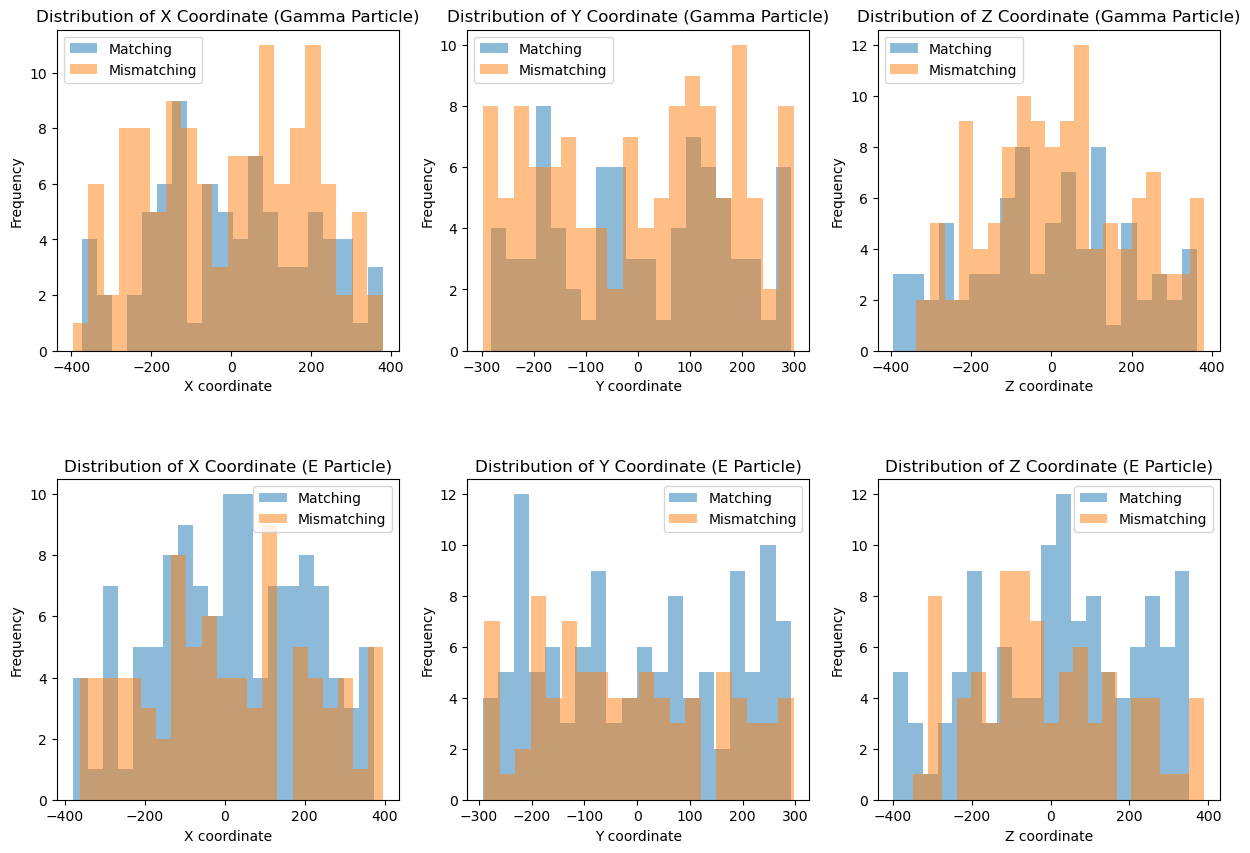

In [9]:
# Plotting histograms for gamma particle
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

# Histograms for gamma particle
ax1.hist(gamma_matching_positions[:, 0, 0], bins=20, alpha=0.5, label='Matching')
ax1.hist(gamma_mismatching_positions[:, 0, 0], bins=20, alpha=0.5, label='Mismatching')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of X Coordinate (Gamma Particle)')
ax1.legend()

ax2.hist(gamma_matching_positions[:, 0, 1], bins=20, alpha=0.5, label='Matching')
ax2.hist(gamma_mismatching_positions[:, 0, 1], bins=20, alpha=0.5, label='Mismatching')
ax2.set_xlabel('Y coordinate')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Y Coordinate (Gamma Particle)')
ax2.legend()

ax3.hist(gamma_matching_positions[:, 0, 2], bins=20, alpha=0.5, label='Matching')
ax3.hist(gamma_mismatching_positions[:, 0, 2], bins=20, alpha=0.5, label='Mismatching')
ax3.set_xlabel('Z coordinate')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Z Coordinate (Gamma Particle)')
ax3.legend()

# Histograms for e particle
ax4.hist(e_matching_positions[:, 0, 0], bins=20, alpha=0.5, label='Matching')
ax4.hist(e_mismatching_positions[:, 0, 0], bins=20, alpha=0.5, label='Mismatching')
ax4.set_xlabel('X coordinate')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of X Coordinate (E Particle)')
ax4.legend()

ax5.hist(e_matching_positions[:, 0, 1], bins=20, alpha=0.5, label='Matching')
ax5.hist(e_mismatching_positions[:, 0, 1], bins=20, alpha=0.5, label='Mismatching')
ax5.set_xlabel('Y coordinate')
ax5.set_ylabel('Frequency')
ax5.set_title('Distribution of Y Coordinate (E Particle)')
ax5.legend()

ax6.hist(e_matching_positions[:, 0, 2], bins=20, alpha=0.5, label='Matching')
ax6.hist(e_mismatching_positions[:, 0, 2], bins=20, alpha=0.5, label='Mismatching')
ax6.set_xlabel('Z coordinate')
ax6.set_ylabel('Frequency')
ax6.set_title('Distribution of Z Coordinate (E Particle)')
ax6.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

#### Percentage of matching points

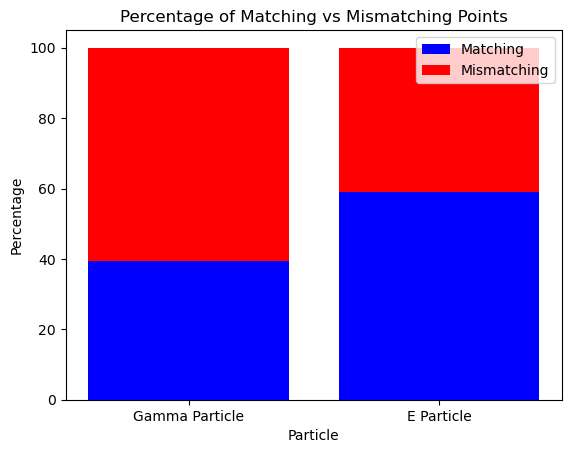

In [10]:
# Calculate the percentage of matching points for each particle
gamma_matching_percent = np.sum(gamma_test_labels == gamma_predictions) / len(gamma_test_labels) * 100
e_matching_percent = np.sum(e_test_labels == e_predictions) / len(e_test_labels) * 100

# Calculate the percentage of mismatching points for each particle
gamma_mismatching_percent = 100 - gamma_matching_percent
e_mismatching_percent = 100 - e_matching_percent

# Plotting
particles = ['Gamma Particle', 'E Particle']
matching_percent = [gamma_matching_percent, e_matching_percent]
mismatching_percent = [gamma_mismatching_percent, e_mismatching_percent]

plt.bar(particles, matching_percent, color='blue', label='Matching')
plt.bar(particles, mismatching_percent, bottom=matching_percent, color='red', label='Mismatching')

plt.xlabel('Particle')
plt.ylabel('Percentage')
plt.title('Percentage of Matching vs Mismatching Points')
plt.legend()

plt.show()

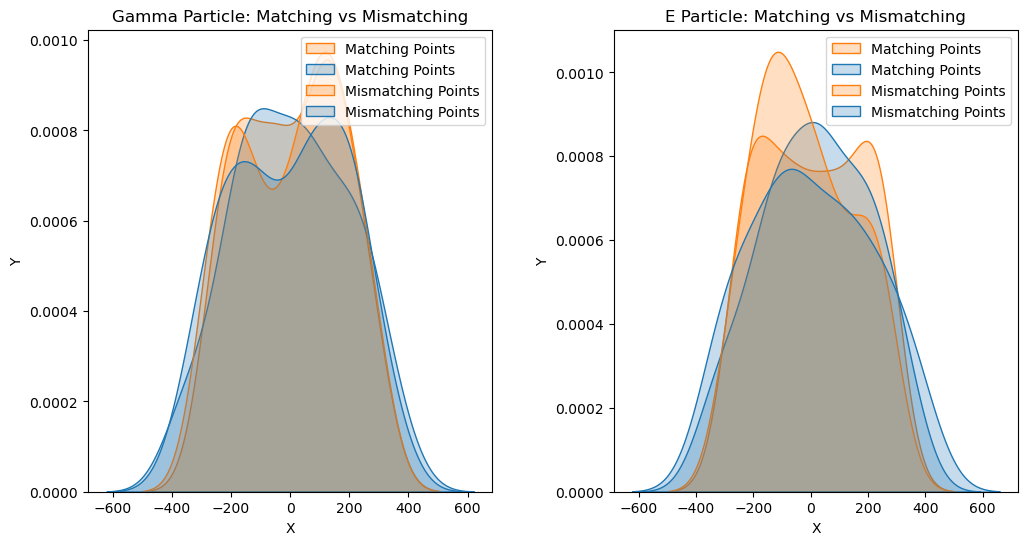

In [11]:
# Function to create density plots
def create_density_plot(ax, positions, labels, predictions, title):
    # Create a mask to separate matching and mismatching points
    matching_mask = (labels == predictions)
    
    # Separate matching and mismatching positions
    matching_positions = positions[matching_mask]
    mismatching_positions = positions[~matching_mask]
    
    # Extract X and Y coordinates for matching and mismatching positions
    matching_X = matching_positions[:, 0, 0]
    matching_Y = matching_positions[:, 0, 1]
    mismatching_X = mismatching_positions[:, 0, 0]
    mismatching_Y = mismatching_positions[:, 0, 1]
    
    # Combine X and Y coordinates for matching and mismatching points
    matching_coordinates = np.column_stack((matching_X, matching_Y))
    mismatching_coordinates = np.column_stack((mismatching_X, mismatching_Y))
    
    # Density plot for matching points
    sns.kdeplot(data=matching_coordinates, color='blue', fill=True, thresh=False, ax=ax,
                label='Matching Points')
    # Density plot for mismatching points
    sns.kdeplot(data=mismatching_coordinates, color='red', fill=True, thresh=False, ax=ax,
                label='Mismatching Points')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.legend()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Density plot for gamma particle
create_density_plot(ax1, gamma_test_positions, gamma_test_labels, gamma_predictions, 'Gamma Particle: Matching vs Mismatching')

# Density plot for e particle
create_density_plot(ax2, e_test_positions, e_test_labels, e_predictions, 'E Particle: Matching vs Mismatching')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()